# Image Data EDA - Bee Disease Diagonis Dataset

# 탐색적 데이터 분석 (EDA) - 꿀벌 질병 진단 데이터셋

### 1. Data Loading and Class Verification
#### Purpose: Load the dataset and inspect its structure.

###  데이터 로딩 및 클래스 확인

목적: 데이터셋을 불러오고 구조를 확인합니다.

In [7]:
import os
from torchvision import datasets, transforms

# 데이터 경로 설정
train_dir = r"C:\Users\khush\OneDrive\Documents\EcoUp\CNN Model\Training"  # 훈련 데이터 경로
val_dir = r"C:\Users\khush\OneDrive\Documents\EcoUp\CNN Model\Validation"  # 검증 데이터 경로

# 이미지 변환: 크기 조정과 Tensor 변환만 적용 (EDA용)
basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 크기 조정
    transforms.ToTensor()           # Tensor로 변환
])

# 데이터셋 로딩
train_dataset = datasets.ImageFolder(train_dir, transform=basic_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=basic_transform)

# 클래스 이름 확인
class_mapping = {idx: class_name for class_name, idx in train_dataset.class_to_idx.items()}
print("클래스 이름 매핑:", class_mapping)

# 훈련 및 검증 데이터셋 이미지 수 확인
print(f"훈련 데이터셋 이미지 수: {len(train_dataset)}")
print(f"검증 데이터셋 이미지 수: {len(val_dataset)}")

클래스 이름 매핑: {0: '유충_부저병', 1: '유충_석고병', 2: '유충_응애', 3: '유충_정상'}
훈련 데이터셋 이미지 수: 20000
검증 데이터셋 이미지 수: 2000


### 2. Visualizing the Number of Images per Class
Purpose: Visualize the number of images in each class (Healthy Larvae, Varroa Mite Infestation, European Foulbrood, Chalkbrood) to analyze the dataset distribution.

### 클래스별 이미지 수 시각화

목적:
각 클래스(정상 유충, 응애 감염, 부저병, 석고병)의 이미지 수를 시각화하여 데이터 분포를 확인합니다.

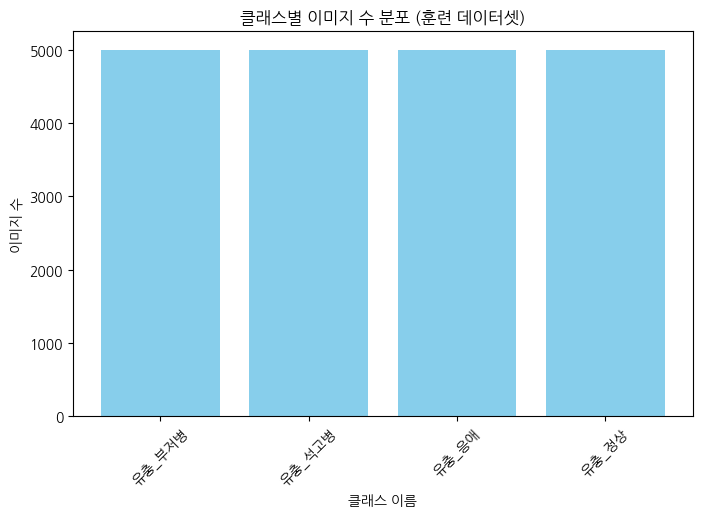

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from collections import Counter

# 폰트 경로 설정 (Windows용)
font_path = r"C:\Users\khush\AppData\Local\Microsoft\Windows\Fonts\NanumGothic-Regular.ttf"  # 경로에 맞게 설정

# 폰트 설정 적용
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


# 훈련 데이터셋의 클래스별 이미지 수 계산
class_counts = Counter(train_dataset.targets)

# 클래스 이름 가져오기
class_names = [class_mapping[idx] for idx in sorted(class_mapping.keys())]

# 클래스별 이미지 수
counts = [class_counts[idx] for idx in sorted(class_counts.keys())]

# 클래스별 이미지 수 시각화
plt.figure(figsize=(8, 5))
plt.bar(class_names, counts, color='skyblue')
plt.title("클래스별 이미지 수 분포 (훈련 데이터셋)")
plt.ylabel("이미지 수")
plt.xlabel("클래스 이름")
plt.xticks(rotation=45)
plt.show()


### 3. Visualizing Sample Images per Class (클래스별 샘플 이미지 시각화)
Purpose: Display sample images from each class to gain insights into their visual characteristics.

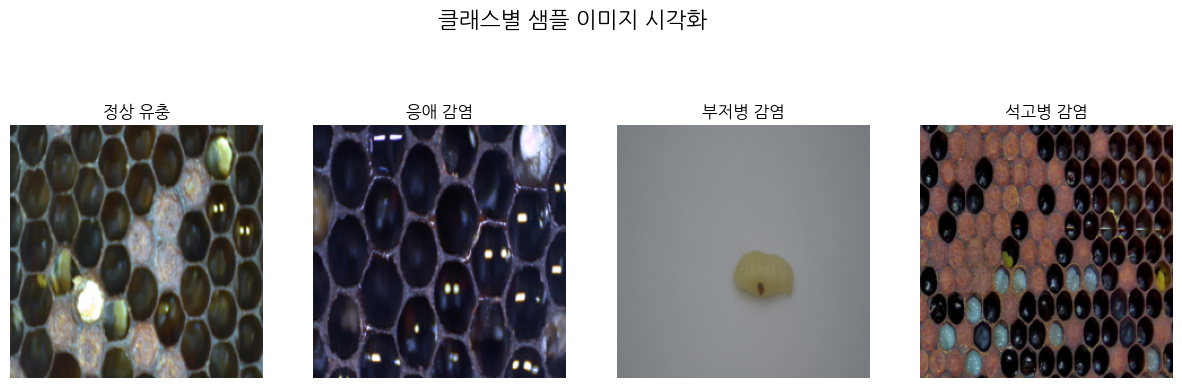

In [4]:
import matplotlib.pyplot as plt
import random

# 클래스별 샘플 이미지 시각화 함수
def visualize_samples(dataset, title):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 1행 4열 서브플롯
    class_names = ["정상 유충", "응애 감염", "부저병 감염", "석고병 감염"]
    
    for i in range(4):  # 4개의 클래스
        # 클래스에 속하는 이미지의 인덱스 추출
        indices = [idx for idx, (_, label) in enumerate(dataset) if label == i]
        sample_idx = random.choice(indices)  # 무작위로 하나 선택
        image, label = dataset[sample_idx]
        
        # 이미지 시각화
        axes[i].imshow(image.permute(1, 2, 0))  # Tensor (C, H, W) → (H, W, C)
        axes[i].axis('off')  # 축 제거
        axes[i].set_title(f"{class_names[label]}")
    
    plt.suptitle(title, fontsize=16)  # 전체 제목
    plt.show()

# 함수 실행
visualize_samples(train_dataset, "클래스별 샘플 이미지 시각화")


### 4. Pixel Value Distribution Analysis (픽셀 값 분포 분석)
Purpose: Analyze the distribution of pixel values to understand the intensity variations across the dataset.

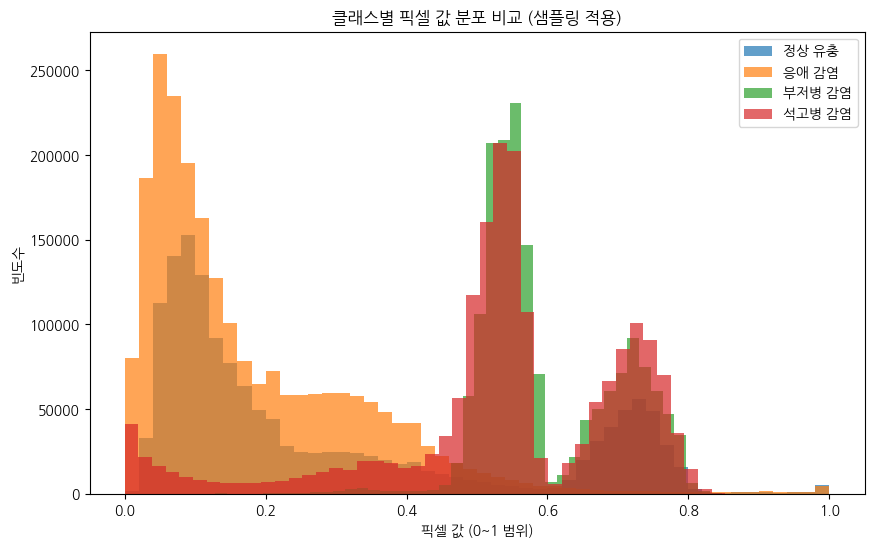

In [6]:
import matplotlib.pyplot as plt
import torch
import random

# 클래스별 픽셀 값 분포를 분석하는 함수 (샘플링 적용)
def sampled_pixel_value_distribution(dataset, class_name, class_index, num_samples=100):
    pixel_values = []
    sampled_indices = random.sample(range(len(dataset)), num_samples)  # 무작위로 num_samples만큼 샘플링

    # 해당 클래스의 일부 이미지에서 픽셀 값 수집
    for idx in sampled_indices:
        image, label = dataset[idx]
        if label == class_index:
            pixel_values.extend(image.view(-1).tolist())  # 텐서를 1차원으로 변환하여 값 추가

    # 히스토그램 시각화
    plt.hist(pixel_values, bins=50, alpha=0.7, label=class_name)
    plt.xlabel("픽셀 값 (0~1 범위)")
    plt.ylabel("빈도수")
    plt.title(f"{class_name} 픽셀 값 분포")

# 전체 클래스에 대해 픽셀 값 분포 시각화
plt.figure(figsize=(10, 6))
class_names = ["정상 유충", "응애 감염", "부저병 감염", "석고병 감염"]

# 클래스별로 샘플링된 이미지에 대한 픽셀 값 분포 시각화
for i, class_name in enumerate(class_names):
    sampled_pixel_value_distribution(train_dataset, class_name, i, num_samples=50)  # 50개 이미지만 샘플링

plt.legend()
plt.title("클래스별 픽셀 값 분포 비교 (샘플링 적용)")
plt.show()


## 출력 해석

### X축:

픽셀 값 범위 (0~1)

0에 가까울수록 어두운 픽셀, 1에 가까울수록 밝은 픽셀입니다.

### Y축:

빈도수: 특정 픽셀 값이 얼마나 자주 등장하는지를 나타냅니다.

### 클래스별 히스토그램:

정상 유충(파란색): 밝은 영역과 어두운 영역이 비교적 균형 있게 분포.

응애 감염(주황색): 어두운 픽셀(0~0.2)이 많이 나타나며 감염된 영역이 어둡게 보이는 경향이 있음.

부저병 감염(초록색): 밝은 픽셀(0.6~0.7)에 집중되어 감염된 부분이 더 눈에 띌 수 있음.

석고병 감염(빨간색): 비교적 어두운 부분과 특정 밝기 영역(0.6~0.8)에 분포.



## Interpretation of Output

### X-Axis:
Represents the pixel value range (0 to 1).

Values close to 0 indicate darker pixels.
Values close to 1 indicate brighter pixels.

### Y-Axis:
Represents the frequency of pixel values, showing how often a specific pixel intensity appears in the dataset.

### Histogram Analysis by Class:
Healthy Larvae (Blue): A relatively balanced distribution of both bright and dark regions.

Varroa Mite Infestation (Orange): A higher concentration of dark pixels (0–0.2), indicating that infected areas tend to appear darker.

Foulbrood (Green): More concentrated in the brighter pixel range (0.6–0.7), suggesting that infected regions stand out.

Chalkbrood (Red): Distributed across darker regions and specific brightness levels (0.6–0.8), indicating variation in infection appearance.

### 5. 평균 이미지 생성

목적:클래스별 평균 이미지를 생성하여 클래스 간 시각적 차이를 한눈에 확인합니다.

### Generating Average Images
Purpose: Create an average image for each class to visually compare and identify differences between classes at a glance.

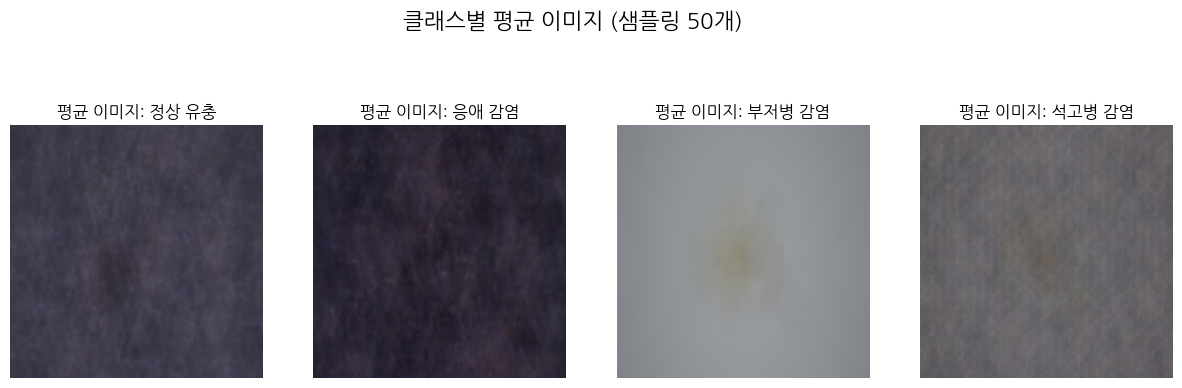

In [11]:
import torch
import matplotlib.pyplot as plt
import random

# 클래스별 평균 이미지 생성 (샘플링 적용)
def compute_mean_image_sampled(dataset, class_index, num_samples=10):
    images = [img for img, label in dataset if label == class_index]  # 해당 클래스 이미지 수집
    sampled_images = random.sample(images, min(num_samples, len(images)))  # 일부 이미지만 샘플링
    stacked_images = torch.stack(sampled_images)  # 이미지 텐서 쌓기
    mean_image = stacked_images.mean(dim=0)  # 평균 계산
    return mean_image

# 평균 이미지 시각화 함수
def visualize_mean_images_sampled(dataset, class_names, num_samples=10):
    fig, axes = plt.subplots(1, len(class_names), figsize=(15, 5))
    for i, class_name in enumerate(class_names):
        mean_img = compute_mean_image_sampled(dataset, i, num_samples)
        axes[i].imshow(mean_img.permute(1, 2, 0).numpy().clip(0, 1))  # Tensor -> 이미지 변환
        axes[i].axis('off')
        axes[i].set_title(f"평균 이미지: {class_name}")
    plt.suptitle(f"클래스별 평균 이미지 (샘플링 {num_samples}개)", fontsize=16)
    plt.show()

# 클래스 이름 정의
class_names = ["정상 유충", "응애 감염", "부저병 감염", "석고병 감염"]

# 평균 이미지 시각화 실행 (샘플링 적용)
visualize_mean_images_sampled(train_dataset, class_names, num_samples=50)

### 6. 이미지 품질 분석 (흐림도 분석)

목적:

이미지가 얼마나 선명한지 또는 흐린지를 평가합니다.
    
흐림 정도가 심한 이미지가 있는지 확인하여 모델 학습에 영향을 줄 수 있는 데이터를 파악합니다.

### Image Quality Analysis (Blurriness Assessment)

Purpose:

Evaluate the sharpness or blurriness of images.
Identify excessively blurry images that may impact model training and performance.

사용 중인 장치: cuda
클래스 '정상 유충'에서 샘플링 중...
클래스 '응애 감염'에서 샘플링 중...
클래스 '부저병 감염'에서 샘플링 중...
클래스 '석고병 감염'에서 샘플링 중...


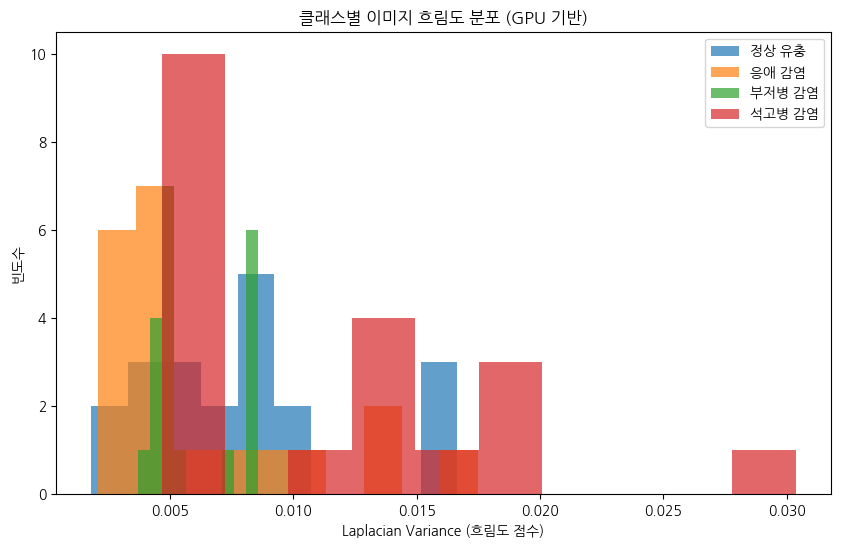

In [15]:
import torch
import matplotlib.pyplot as plt
import random

# 흐림도 계산 함수 (PyTorch 기반, GPU 사용)
def compute_blur_score_pytorch(image, device):
    image = image.to(device)  # 이미지를 GPU로 이동
    gray = image.mean(dim=0, keepdim=True)  # RGB -> Grayscale (평균값 계산)
    laplacian_kernel = torch.tensor([[0, 1, 0],
                                     [1, -4, 1],
                                     [0, 1, 0]], dtype=torch.float32, device=device).unsqueeze(0).unsqueeze(0)
    gray = gray.unsqueeze(0)  # 차원 추가 (1, 1, H, W)
    
    # Laplacian 필터 적용 (Convolution)
    laplacian = torch.nn.functional.conv2d(gray, laplacian_kernel, padding=1)
    variance = torch.var(laplacian)  # Laplacian 결과의 분산 계산
    return variance.item()

# 클래스별 흐림도 분석 함수 (GPU 기반)
def analyze_blur_scores_gpu(dataset, class_names, device, num_samples=20):
    blur_scores = {class_name: [] for class_name in class_names}

    # 클래스별 흐림도 계산
    for class_idx, class_name in enumerate(class_names):
        print(f"클래스 '{class_name}'에서 샘플링 중...")
        sampled_indices = random.sample([i for i, (_, label) in enumerate(dataset) if label == class_idx], num_samples)
        for idx in sampled_indices:
            image, _ = dataset[idx]
            score = compute_blur_score_pytorch(image, device)
            blur_scores[class_name].append(score)

    return blur_scores

# 흐림도 시각화 함수
def plot_blur_scores(blur_scores):
    plt.figure(figsize=(10, 6))
    for class_name, scores in blur_scores.items():
        plt.hist(scores, bins=10, alpha=0.7, label=class_name)
    plt.title("클래스별 이미지 흐림도 분포 (GPU 기반)")
    plt.xlabel("Laplacian Variance (흐림도 점수)")
    plt.ylabel("빈도수")
    plt.legend()
    plt.show()

# 클래스 이름 설정
class_names = ["정상 유충", "응애 감염", "부저병 감염", "석고병 감염"]

# GPU 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 중인 장치: {device}")

# 흐림도 분석 실행 (GPU 활용)
blur_scores_gpu = analyze_blur_scores_gpu(train_dataset, class_names, device, num_samples=20)

# 흐림도 시각화
plot_blur_scores(blur_scores_gpu)


#### Laplacian Variance 값:

X축: 이미지의 흐림도 점수 (Laplacian Variance)

Y축: 해당 흐림도 점수를 가진 이미지의 빈도수

### 클래스별 분포:

정상 유충(파란색): 흐림도가 중간 정도에 분포하며 비교적 선명한 이미지가 많습니다.
    
응애 감염(주황색): 흐림도가 낮은 점수가 많아 일부 이미지가 더 흐릿할 수 있습니다.

부저병 감염(초록색): 흐림도 분포가 중간 정도로, 비교적 선명한 이미지를 확인할 수 있습니다.

석고병 감염(빨간색): 흐림도가 낮은 값에 집중되어 있으며, 흐린 이미지가 많은 것으로 보입니다.



#### Laplacian Variance Values

X-Axis: Blurriness score (Laplacian Variance)

Y-Axis: Frequency of images with a given blurriness score

### Class-wise Distribution:

Healthy Larvae (Blue): Mostly distributed around mid-range blurriness scores, indicating relatively sharp images.

Varroa Mite Infestation (Orange): More images with low blurriness scores, suggesting some may be blurry.

European Foulbrood (Green): Shows a balanced distribution, with most images being moderately sharp.

Chalkbrood (Red): Concentrated in the lower blurriness range, indicating a higher number of blurry images.

### 7. 이미지 해상도 분석

목적:

데이터셋의 이미지 해상도를 확인하여 크기가 서로 다른 이미지가 있는지 분석합니다.

### Image Resolution Analysis

Purpose:
Examine the resolution of images in the dataset.

Identify variations in image sizes to ensure consistency in preprocessing.

사용 중인 장치: cuda
클래스 '정상 유충'에서 해상도 분석 중...
클래스 '응애 감염'에서 해상도 분석 중...
클래스 '부저병 감염'에서 해상도 분석 중...
클래스 '석고병 감염'에서 해상도 분석 중...


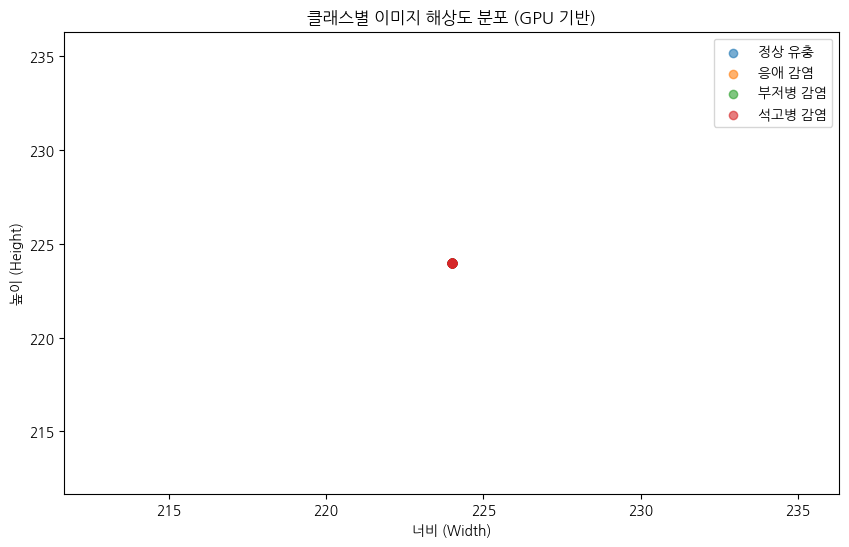

In [16]:
import torch
import matplotlib.pyplot as plt
import random

# GPU 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 중인 장치: {device}")

# 이미지 해상도 분석 함수 (GPU 기반)
def analyze_image_resolutions_gpu(dataset, class_names, device, num_samples=10):
    resolution_data = {class_name: [] for class_name in class_names}

    # 각 클래스에서 샘플링된 이미지의 해상도 수집
    for class_idx, class_name in enumerate(class_names):
        print(f"클래스 '{class_name}'에서 해상도 분석 중...")
        sampled_indices = random.sample([i for i, (_, label) in enumerate(dataset) if label == class_idx], num_samples)
        for idx in sampled_indices:
            image, _ = dataset[idx]
            image = image.to(device)  # 이미지를 GPU로 이동
            resolution = image.shape[1], image.shape[2]  # 높이, 너비 가져오기
            resolution_data[class_name].append(resolution)

    return resolution_data

# 해상도 시각화 함수
def plot_resolution_distribution(resolution_data):
    plt.figure(figsize=(10, 6))
    for class_name, resolutions in resolution_data.items():
        heights, widths = zip(*resolutions)
        plt.scatter(widths, heights, alpha=0.6, label=class_name)
    plt.xlabel("너비 (Width)")
    plt.ylabel("높이 (Height)")
    plt.title("클래스별 이미지 해상도 분포 (GPU 기반)")
    plt.legend()
    plt.show()

# 클래스 이름 설정
class_names = ["정상 유충", "응애 감염", "부저병 감염", "석고병 감염"]

# 이미지 해상도 분석 실행 (GPU 활용)
resolution_data_gpu = analyze_image_resolutions_gpu(train_dataset, class_names, device, num_samples=20)

# 해상도 시각화
plot_resolution_distribution(resolution_data_gpu)


### 해석 및 결론

데이터 일관성 확인:

모든 이미지가 동일한 해상도를 갖고 있음을 확인했습니다.이는 모델 학습에 매우 적합한 상태입니다.

모델 입력 준비 완료:

이미지 크기를 모델 입력 크기(224x224)로 고정했기 때문에 추가적인 조정은 필요하지 않습니다. 해상도 분석 결과를 통해 데이터셋이 균일하게 준비되었음을 증명할 수 있습니다. 해상도 차이가 존재하지 않기 때문에 해상도 관련 추가 분석은 필요하지 않습니다.

### Interpretation and Conclusion
Data Consistency Check:
    
All images have the same resolution, ensuring uniformity across the dataset.
This consistency is ideal for model training.

### Model Input Readiness:
Since all images have been resized to the model’s required input size (224x224), no further adjustments are needed.
The resolution analysis confirms that the dataset is uniformly prepared.
No additional resolution-based analysis is required as there are no variations in image sizes.